# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [2]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

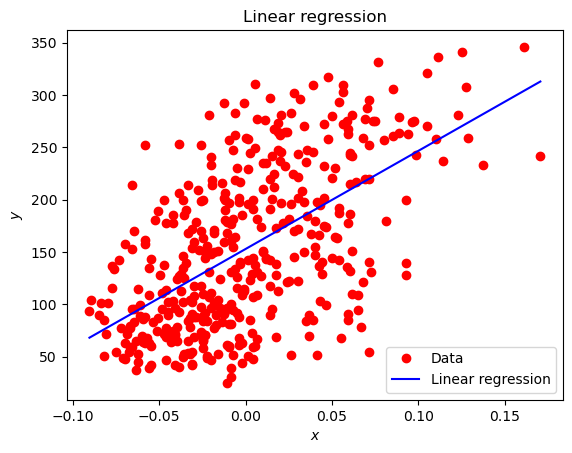

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [8]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

#### Initialization of dataset variables

In [2]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.datasets import load_diabetes, load_breast_cancer

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

# create train and test datasets for the breast cancer dataset
X_bc = breast_cancer.data
y_bc = breast_cancer.target

#X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X, y, stratify=y, random_state=40)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, stratify=y_bc, random_state=40)

# create train and test
# datasets for the diabetes dataset
X_diabetes = diabetes.data
y_diabetes = diabetes.target

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, random_state=40)


### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

#### Answer

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

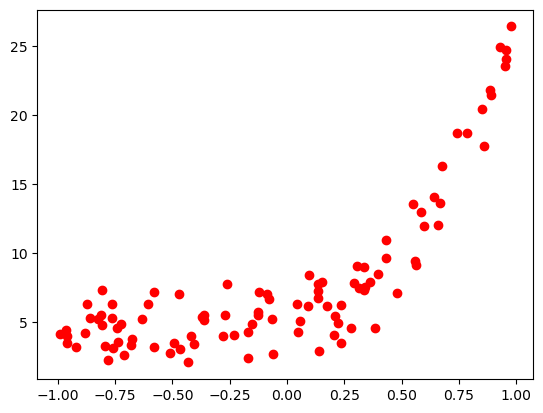

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

#### Introduction/Explanation of code

#### Results & Discussion

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

#### Introduction/ Explanation of code

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def create_and_train_knn_pipeline(X_train, y_train, param_grid, n_cv=5, scaler=True):
    """
    Creates and trains a KNeighborsClassifier model using GridSearchCV.
    
    Parameters:
    - X_train (np.ndarray): Training features.
    - y_train (np.ndarray): Training labels.
    - param_grid (dict): The hyperparameter grid to search over. 
                        Example: {'knn__n_neighbors': [1, 3, 5, 7]}
    - n_cv (int): Number of cross-validation folds. Default is 5.
    - scaler (bool): Whether to apply feature scaling with StandardScaler. Default is True.
    
    Returns:
    - model_grid (GridSearchCV object): The trained GridSearchCV object.
    """
    
    # Initialize the KNeighborsClassifier
    knn = neighbors.KNeighborsClassifier()

    scaler = StandardScaler()
    # Create the pipeline
    model_pipeline = Pipeline([
                    ("scaler", scaler),
                    ("knn", knn)
                    ])

    # Create the GridSearchCV object
    model_grid = GridSearchCV(estimator= model_pipeline, 
                              param_grid=param_grid, 
                              cv= n_cv, 
                              scoring='roc_auc', # the default would be accuracy, but roc_auc is more related to the question (although not really important for our intent)
                            )
    
    # Fit the model using GridSearchCV
    model_grid.fit(X_train, y_train)
    
    # cross-validation results
    cv_results = model_grid.cv_results_
    
    return model_grid, cv_results

model_grid, cv_results = create_and_train_knn_pipeline(X_bc_train, y_bc_train, param_grid={'knn__n_neighbors':[i for i in range(1,16,2)]}, n_cv=5)
print(cv_results)


{'mean_fit_time': array([0.00189886, 0.00141611, 0.00158434, 0.00195336, 0.00108948,
       0.00138659, 0.00146255, 0.00138702]), 'std_fit_time': array([0.00078323, 0.00035324, 0.00053643, 0.00049575, 0.00056445,
       0.00037434, 0.00045284, 0.00026385]), 'mean_score_time': array([0.00630388, 0.00599051, 0.00636454, 0.00579743, 0.00582099,
       0.00560412, 0.00599103, 0.00546451]), 'std_score_time': array([0.00052835, 0.00107662, 0.00107429, 0.00054015, 0.00089483,
       0.00064172, 0.00092892, 0.00025231]), 'param_knn__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'params': [{'knn__n_neighbors': 1}, {'knn__n_neighbors': 3}, {'knn__n_neighbors': 5}, {'knn__n_neighbors': 7}, {'knn__n_neighbors': 9}, {'knn__n_neighbors': 11}, {'knn__n_neighbors': 13}, {'knn__n_neighbors': 15}], 'split0_test_score': array([0.91608796, 0.96325231, 0.97569444, 0.97916667, 0.97743056,
  

In [49]:
from sklearn import neighbors, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()
model = Pipeline([
				 ("scaler", scaler),
				 ("knn", knn)
				])
model.fit(X_bc_train, y_bc_train)
y_bc_predict = model.predict(X_bc_test)

model_grid= GridSearchCV(estimator = model, param_grid = {'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, cv = 5)
model_grid.fit(X_bc_train, y_bc_train)
pd.DataFrame(model_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001961,0.000451,0.005451,0.001427,1,{'knn__n_neighbors': 1},0.918605,0.941176,0.964706,0.917647,0.952941,0.939015,0.018611,8
1,0.001765,0.000397,0.004874,0.000757,3,{'knn__n_neighbors': 3},0.965116,0.941176,0.976471,0.917647,0.964706,0.953023,0.021092,3
2,0.002041,0.000534,0.014738,0.017102,5,{'knn__n_neighbors': 5},0.965116,0.952941,0.976471,0.917647,0.964706,0.955376,0.020280,1
3,0.001896,0.000667,0.005003,0.000661,7,{'knn__n_neighbors': 7},0.965116,0.941176,0.964706,0.917647,0.964706,0.950670,0.018886,6
4,0.000919,0.000475,0.004286,0.000597,9,{'knn__n_neighbors': 9},0.965116,0.952941,0.964706,0.929412,0.952941,0.953023,0.012963,2
5,0.001013,0.000012,0.004438,0.000402,11,{'knn__n_neighbors': 11},0.965116,0.929412,0.964706,0.941176,0.952941,0.950670,0.013805,5
6,0.001214,0.000399,0.004711,0.000637,13,{'knn__n_neighbors': 13},0.953488,0.941176,0.964706,0.941176,0.952941,0.950698,0.008836,4
7,0.001212,0.000399,0.004491,0.000640,15,{'knn__n_neighbors': 15},0.941860,0.929412,0.964706,0.941176,0.952941,0.946019,0.011947,7


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from statistics import stdev  # Import stdev function

cm = confusion_matrix(y_bc_test, y_bc_predict)
scores = cross_val_score(model_grid, X_bc_train, y_bc_train, cv=5)
scores= cross_val_score(model_grid, X_bc_train, y_bc_train, cv=5)

grid_cv_score = scores.mean()
grid_cv_stdev = stdev(scores)

print('Cross Validation Recall scores are: {}'.format(scores))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.96511628 0.94117647 0.96470588 0.91764706 0.95294118]
Average Cross Validation Recall score:  0.9483173734610123
Cross Validation Recall standard deviation:  0.019772624392229123


AUC-ROC Curve for Random Forest with tuned hyperparameters: 0.9811
fpr: [0.         0.         0.01886792 0.03773585 0.05660377 0.22641509
 1.        ] 
tpr:  [0.         0.85555556 0.96666667 1.         1.         1.
 1.        ]


c:\Users\tac70\anaconda3\envs\8dm50\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


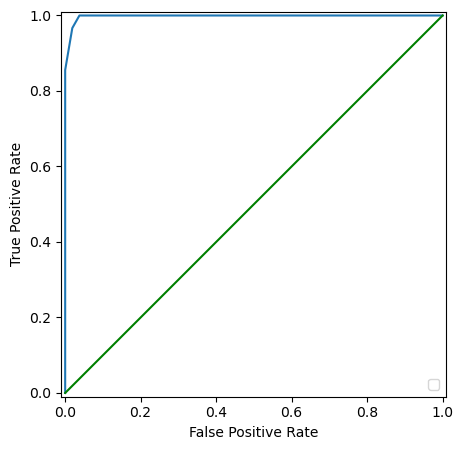

In [35]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_bc_test, y_bc_predict)
print(f"AUC-ROC Curve for Random Forest with tuned hyperparameters: {ROCAUCscore:.4f}")

y_proba = model_grid.predict_proba(X_bc_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    print("fpr:", fpr, "\ntpr: ", tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_bc_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_bc_test, y_bc_predict)

False Positive Rates (FPR): [0.         0.         0.01886792 0.03773585 0.05660377 0.22641509
 1.        ] 
True Positive Rates (TPR): [0.         0.85555556 0.96666667 1.         1.         1.
 1.        ] 
Thresholds: [inf 1.  0.8 0.6 0.4 0.2 0. ]


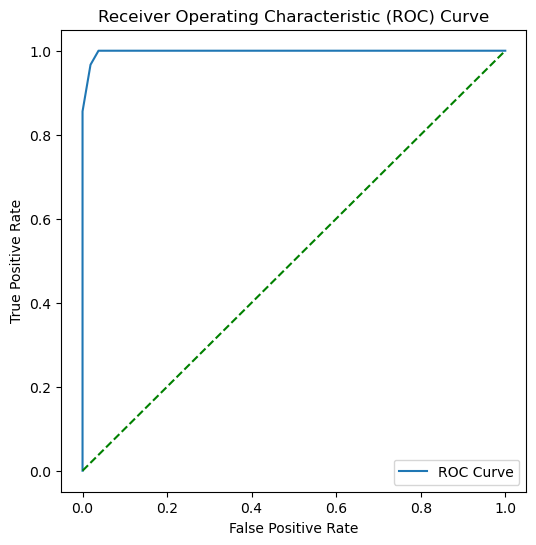

In [36]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

def plot_auc_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    print("False Positive Rates (FPR):", fpr, "\nTrue Positive Rates (TPR):", tpr, "\nThresholds:", thresholds)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Diagonal line (random guess)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Use predicted probabilities for the ROC curve
plot_auc_roc_curve(y_bc_test, y_proba[:, 1])


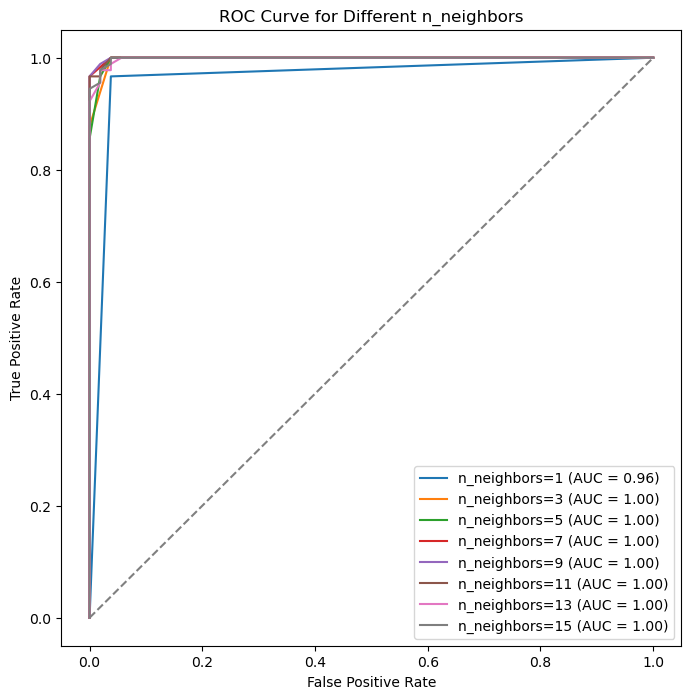

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming the model_grid is already fitted
def plot_roc_for_different_neighbors(grid_search, X_test, y_test):
    # Get the cv_results_ from the GridSearchCV
    results = grid_search.cv_results_
    
    # List of neighbors used in grid search
    neighbors_list = grid_search.param_grid['knn__n_neighbors']
    
    plt.figure(figsize=(8, 8))

    for i, neighbors in enumerate(neighbors_list):
        # Get the model corresponding to this neighbors value
        model = grid_search.best_estimator_.set_params(knn__n_neighbors=neighbors)
        model.fit(X_bc_train, y_bc_train)  # Refit with this neighbor value
        
        # Predict probabilities for the test set
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'n_neighbors={neighbors} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line representing random guessing
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Different n_neighbors')
    plt.legend(loc='lower right')
    plt.show()

# Call the function to plot the ROC curves
plot_roc_for_different_neighbors(model_grid, X_bc_test, y_bc_test)


#### Results & Discussion

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


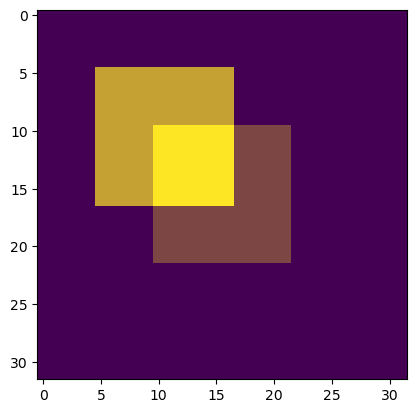

In [18]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

#### Introduction/Explanation of code

#### Results & Discussion